In [1]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-08-18')

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932
...,...,...,...,...,...,...
2020-08-12,453.100006,441.190002,441.989990,452.040009,41486200.0,452.040009
2020-08-13,464.170013,455.709991,457.720001,460.040009,52520500.0,460.040009
2020-08-14,460.000000,452.179993,459.320007,459.630005,41391300.0,459.630005


C:\Users\abdul\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


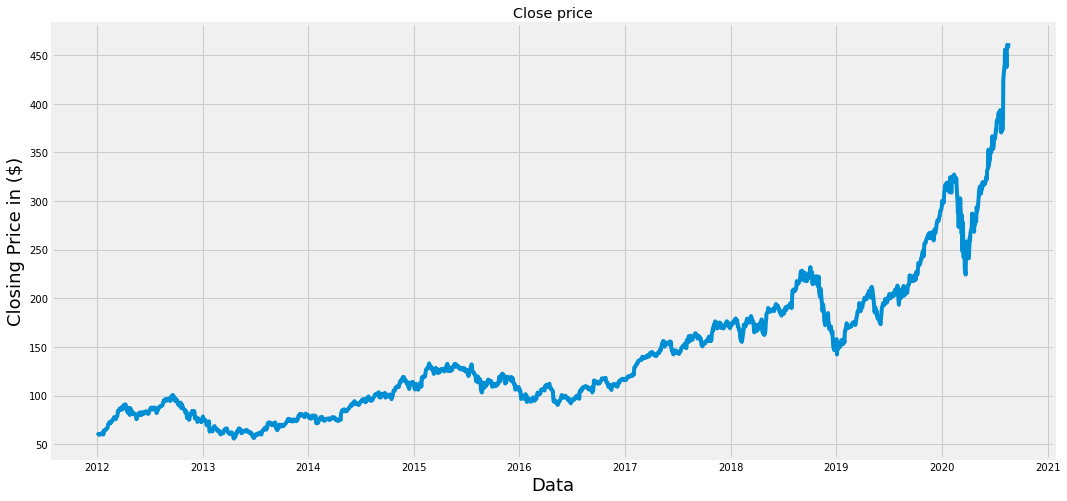

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close price')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Closing Price in ($)', fontsize=18)
plt.show()

In [5]:
data = df.filter(['Close'])
dataset = data.values


In [6]:
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1737

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00727536],
       [0.0080521 ],
       [0.00966533],
       ...,
       [0.99355411],
       [0.99060176],
       [1.        ]])

In [8]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 60 :
        print(x_train)
        print(y_train)

[array([0.00727536, 0.0080521 , 0.00966533, 0.01120124, 0.01096576,
       0.01149647, 0.01125396, 0.01084626, 0.01029095, 0.01200961,
       0.01355958, 0.01308159, 0.01046316, 0.01296209, 0.01050182,
       0.01972782, 0.01901434, 0.01994573, 0.02195963, 0.02317922,
       0.02307729, 0.02270123, 0.02430392, 0.0258117 , 0.02751984,
       0.03027886, 0.03607454, 0.0361624 , 0.03938888, 0.04179993,
       0.03765613, 0.0392518 , 0.03922017, 0.04369434, 0.04305818,
       0.04423558, 0.04635142, 0.04752884, 0.05092049, 0.05339131,
       0.05410477, 0.05435432, 0.0501297 , 0.04911043, 0.04926157,
       0.05323313, 0.05435081, 0.05675131, 0.06240993, 0.06995944,
       0.06854654, 0.06855005, 0.07400834, 0.07571646, 0.07450038,
       0.07338976, 0.07223343, 0.07607495, 0.07871097, 0.07981457])]
[0.07708718027649658]


In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train.shape

(1677, 60)

In [11]:
x_train

array([[0.00727536, 0.0080521 , 0.00966533, ..., 0.07607495, 0.07871097,
        0.07981457],
       [0.0080521 , 0.00966533, 0.01120124, ..., 0.07871097, 0.07981457,
        0.07708718],
       [0.00966533, 0.01120124, 0.01096576, ..., 0.07981457, 0.07708718,
        0.07346357],
       ...,
       [0.4032623 , 0.41133198, 0.41637553, ..., 0.33887713, 0.32000689,
        0.29815971],
       [0.41133198, 0.41637553, 0.42277224, ..., 0.32000689, 0.29815971,
        0.29766766],
       [0.41637553, 0.42277224, 0.42456822, ..., 0.29815971, 0.29766766,
        0.28662105]])

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1677, 60, 1)

In [13]:
x_train.shape[1]

60

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 32,551
Trainable params: 32,551
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(x_train, y_train, batch_size=1, epochs=4)

Epoch 1/4
1677/1677 [==============================] - 104s 62ms/step - loss: 4.7334e-04
Epoch 2/4
1677/1677 [==============================] - 105s 63ms/step - loss: 2.0261e-04
Epoch 3/4
1677/1677 [==============================] - 113s 68ms/step - loss: 1.6635e-04
Epoch 4/4
1677/1677 [==============================] - 112s 67ms/step - loss: 1.1373e-04


In [18]:
test_data = scaled_data[training_data_len-60:,:]
x_test =[]
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [19]:
x_test= np.array(x_test)
x_test.shape

(434, 60)

In [20]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(434, 60, 1)

In [21]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [22]:
rmse= np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.937525560229605

C:\Users\abdul\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


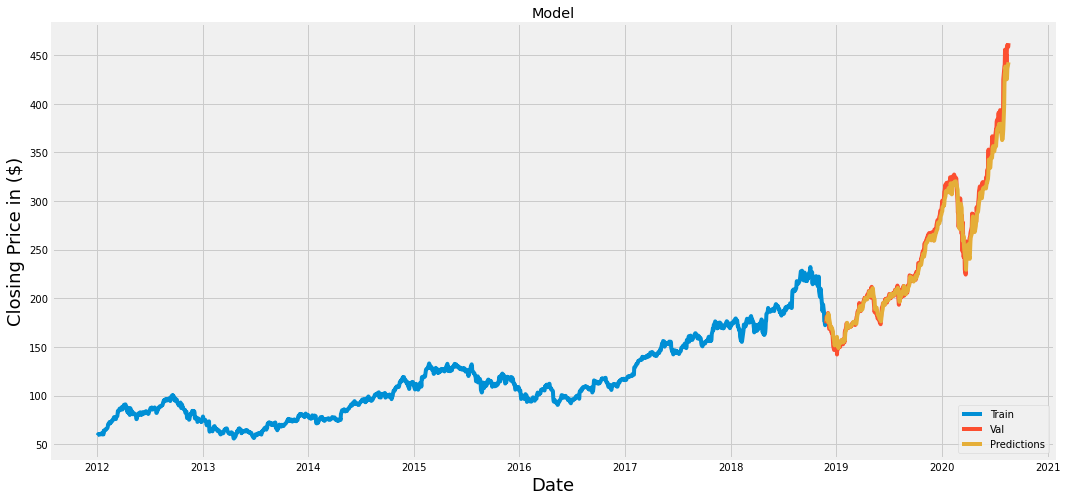

In [23]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the Plot
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price in ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc= 'lower right')
plt.show()

In [24]:
valid

,Close,Predictions
Date,,
2018-11-27,174.240005,175.019730
2018-11-28,180.940002,175.148956
2018-11-29,179.550003,178.717941
2018-11-30,178.580002,181.135345
2018-12-03,184.820007,181.758026
...,...,...
2020-08-12,452.040009,425.180267
2020-08-13,460.040009,428.060089
2020-08-14,459.630005,436.081085


In [25]:
#Get the Quote
apple_quote= web.DataReader('AAPL', data_source='yahoo',start='2012-01-01',end='2020-08-18')
#create new data frame
new_df= apple_quote.filter(['Close'])
#Get last 60 days closing price
last_60_days= new_df[-60:].values
#scale the data
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the last 60 days prices to X_test
X_test.append(last_60_days_scaled)
#lets convert X_test to a Numpy array
X_test = np.array(X_test)
#Reshape the data to 3 dimentional
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price= model.predict(X_test)
#inverse Transform the Scaled data 
pred_price= scaler.inverse_transform(pred_price)

In [26]:
print(pred_price)

[[444.44473]]
